In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime



In [32]:
df = pd.read_csv("D:/PYTHON/WS CUBE TECH/Datasets/Airbnb+Data/Airbnb Data/Listings.csv",encoding='unicode_escape', low_memory=False, parse_dates=["host_since"])
df.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [37]:
paris = df.query("city == 'Paris'").loc[:, ["host_since", "neighbourhood", "city","accommodates", "price" ]]
paris.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [38]:
paris.describe()

,host_since,accommodates,price
count,64657,64690.000000,64690.000000
mean,2015-11-01 11:06:05.528867584,3.037997,113.096445
min,2008-08-30 00:00:00,0.000000,0.000000
25%,2014-03-09 00:00:00,2.000000,59.000000
50%,2015-07-07 00:00:00,2.000000,80.000000
75%,2017-05-29 00:00:00,4.000000,120.000000
max,2021-02-07 00:00:00,16.000000,12000.000000
std,NaN,1.588766,214.433668


In [43]:
paris.query("price == 0 and accommodates == 0 ").count()

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

In [117]:
paris_listings_neighbourhood = paris.groupby("neighbourhood").agg({"price": "mean"}).sort_values("price")

paris_listings_neighbourhood.tail(2)

,price
neighbourhood,
Louvre,175.379972
Elysee,210.536765


In [98]:
paris_listings_accomodations = paris.query("neighbourhood == 'Elysee'").groupby("accommodates").agg({"price":"mean"}).sort_values("price")
paris_listings_accomodations

,price
accommodates,
0,0.000000
1,79.522222
3,152.828767
2,155.103352
4,212.096070
5,328.817073
6,355.508571
8,405.518519
7,411.538462


In [67]:
paris["year"]= paris["host_since"].dt.strftime("%Y")

paris_listings_over_time = paris.set_index("host_since").resample("Y").agg({"accommodates":"count", "price":"mean"})
paris_listings_over_time.head()

,accommodates,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615


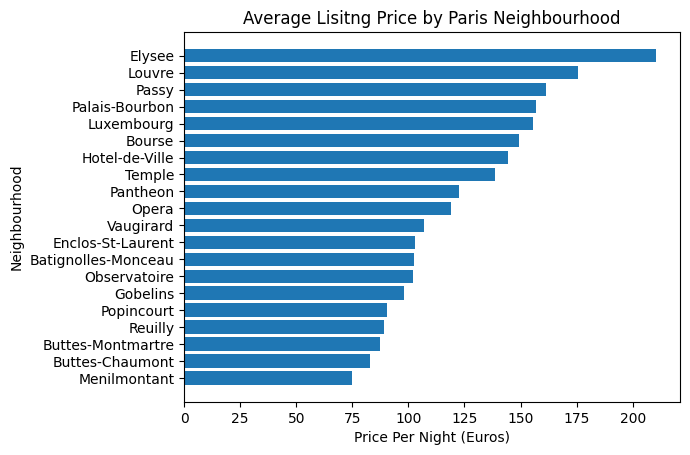

In [88]:
plt.barh(paris_listings_neighbourhood.index,paris_listings_neighbourhood["price"] )

plt.title("Average Lisitng Price by Paris Neighbourhood")
plt.xlabel("Price Per Night (Euros)")
plt.ylabel("Neighbourhood")
plt.show()

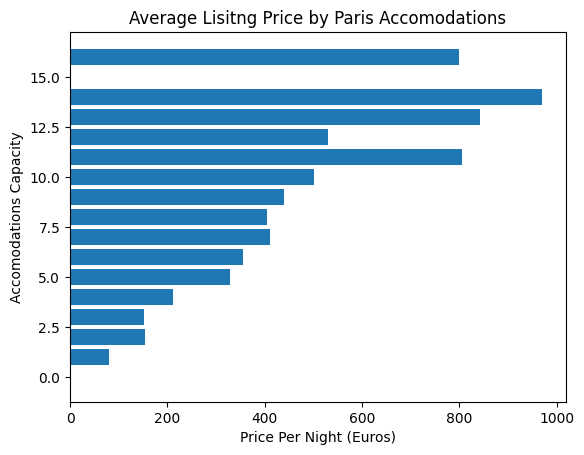

In [102]:

plt.barh(paris_listings_accomodations.index,paris_listings_accomodations["price"] )

plt.title("Average Lisitng Price by Paris Accomodations")
plt.xlabel("Price Per Night (Euros)")
plt.ylabel("Accomodations Capacity")
plt.show()

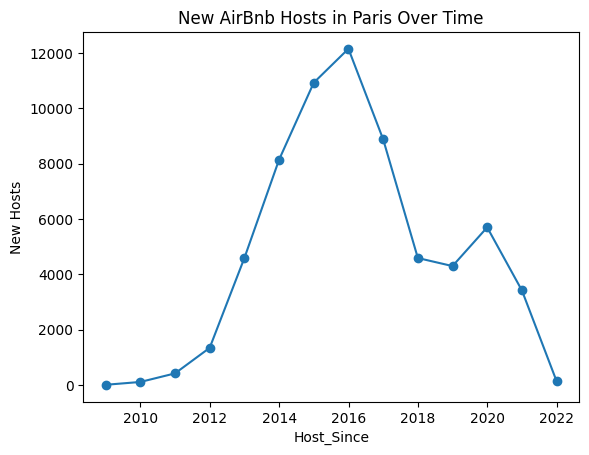

In [106]:
plt.plot(paris_listings_over_time.index,paris_listings_over_time["accommodates"], marker= "o")
plt.title("New AirBnb Hosts in Paris Over Time")
plt.xlabel("Host_Since")
plt.ylabel("New Hosts")
plt.show()

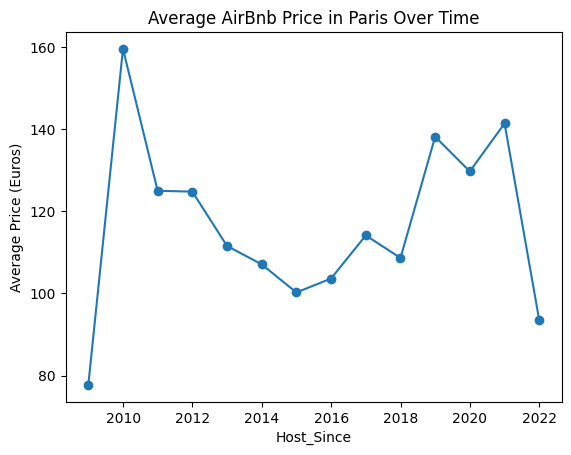

In [107]:
plt.plot(paris_listings_over_time.index,paris_listings_over_time["price"], marker= "o")
plt.title("Average AirBnb Price in Paris Over Time")
plt.xlabel("Host_Since")
plt.ylabel("Average Price (Euros)")
plt.show()

TypeError: cannot unpack non-iterable Axes object

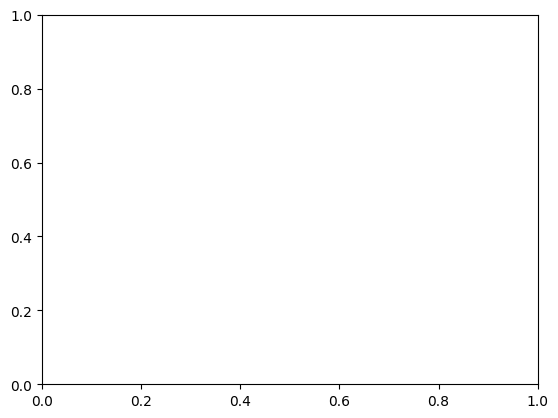

In [116]:
fig, ax1 = plt.subplot()

ax1.plot(paris_listings_over_time.index,paris_listings_over_time["accommodates"], marker= "o", c = "blue", )
# ax1.set_xlabel('Host_Since')
ax1.set_ylabel('New Hosts', color='blue')

ax2 = ax1.twinx()
ax2.plot(paris_listings_over_time.index,paris_listings_over_time["price"], marker= "o", c= "pink")
ax2.set_ylabel('Average Price (Euros)', color='pink')


plt.show()